<a href="https://colab.research.google.com/github/Guhenriquetorres/Analise_Dados_Enem_2021/blob/main/Prova_Programa%C3%A7%C3%A3o_de_Computadores_py2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instituição de ensino: IESB

Aluno: Gustavo Henrique Vicente

***PEGUNTAS :***

**1**.Como a distribuição dos anos dos filmes e das cerimônias de premiação varia por categoria de prêmio(mais relevantes)?

**2**.
Existe uma tendência temporal nas categorias de premiação mais frequentes ao longo dos anos(mais relevantes)?

**3**.Qual é o número de vitórias para cada categoria(mais relevantes)?

**4**.
Existem tendências de premiação ao longo do tempo para categorias específicas(mais relevantes)?

**5**.
Como a distribuição dos vencedores varia entre diferentes categorias de premiação ao longo dos anos(mais relevantes)?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/the_oscar_award.csv")

In [4]:
df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10754,2022,2023,95,Writing (Original Screenplay),Written by Martin McDonagh,The Banshees of Inisherin,NaN
10755,2022,2023,95,Writing (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,NaN
10756,2022,2023,95,Writing (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,NaN
10757,2022,2023,95,Writing (Original Screenplay),Written by Todd Field,Tár,NaN


In [5]:
df.isnull().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               3
film             310
winner           120
dtype: int64

In [9]:
df.shape

(10759, 7)

In [10]:
df.dropna(inplace=True)


In [11]:
# Informações do DataFrame
print("\nInformações do DataFrame:")
print(df.info())



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 10329 entries, 0 to 10634
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10329 non-null  int64 
 1   year_ceremony  10329 non-null  int64 
 2   ceremony       10329 non-null  int64 
 3   category       10329 non-null  object
 4   name           10329 non-null  object
 5   film           10329 non-null  object
 6   winner         10329 non-null  object
dtypes: int64(3), object(4)
memory usage: 645.6+ KB
None


In [12]:
# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())



Estatísticas descritivas das colunas numéricas:
          year_film  year_ceremony      ceremony
count  10329.000000   10329.000000  10329.000000
mean    1975.723981    1976.723981     48.746539
std       26.666254      26.666254     26.627677
min     1927.000000    1928.000000      1.000000
25%     1952.000000    1953.000000     25.000000
50%     1975.000000    1976.000000     48.000000
75%     1999.000000    2000.000000     72.000000
max     2021.000000    2022.000000     94.000000


In [13]:
# Contagem de valores únicos em cada coluna
print("\nContagem de valores únicos em cada coluna:")
print(df.nunique())



Contagem de valores únicos em cada coluna:
year_film          94
year_ceremony      94
ceremony           94
category          104
name             6589
film             4937
winner              2
dtype: int64


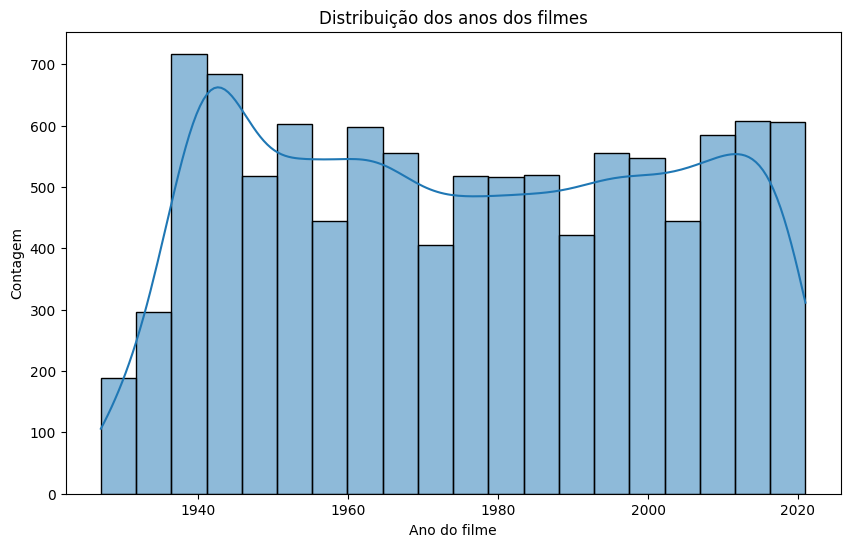

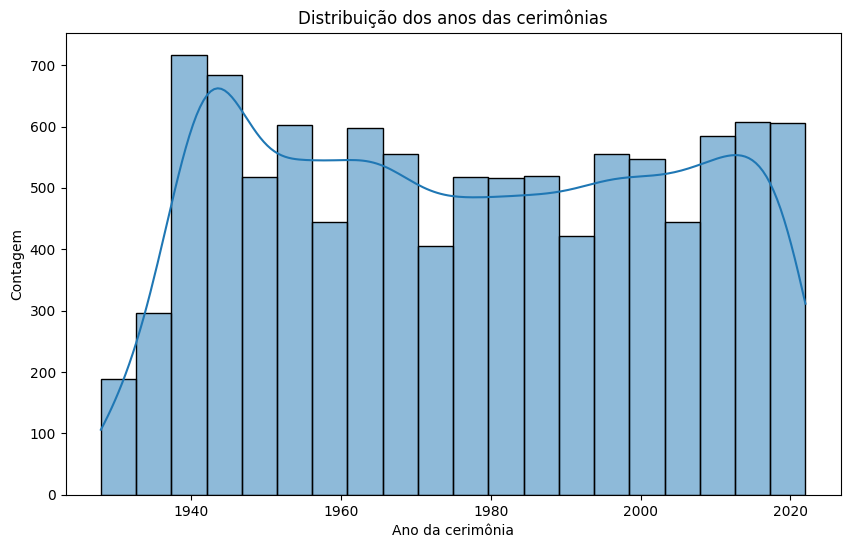

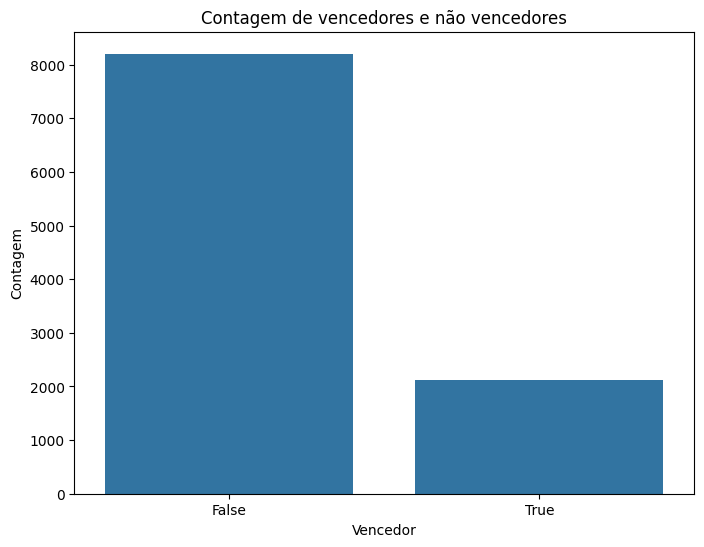

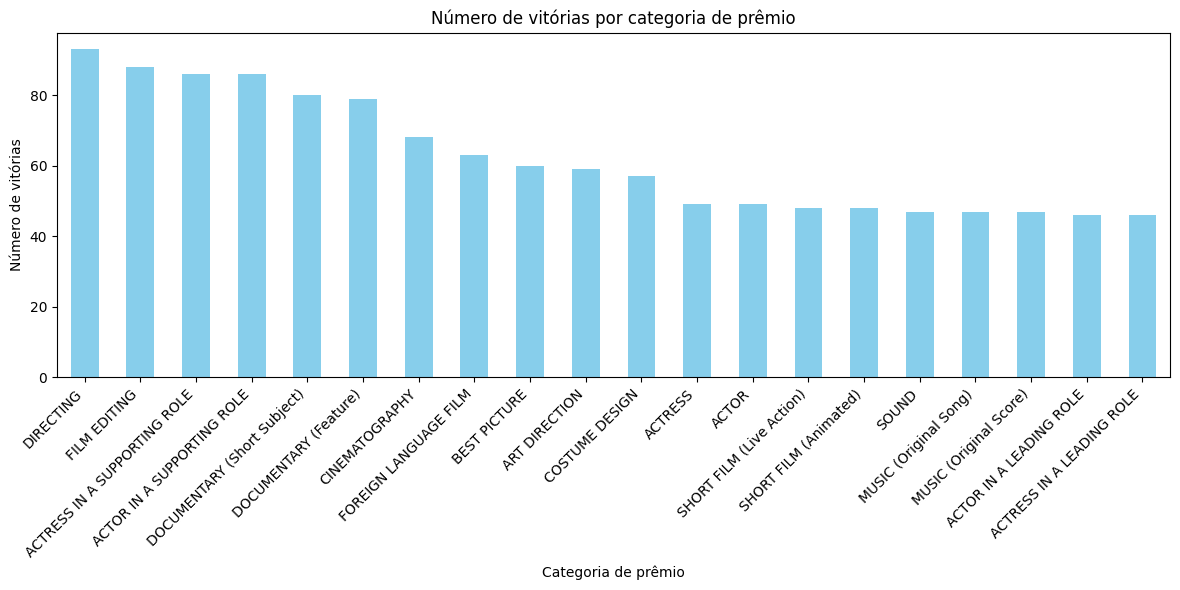

In [25]:
# Visualização da distribuição das colunas numéricas
plt.figure(figsize=(10, 6))
sns.histplot(df['year_film'], bins=20, kde=True)
plt.title('Distribuição dos anos dos filmes')
plt.xlabel('Ano do filme')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['year_ceremony'], bins=20, kde=True)
plt.title('Distribuição dos anos das cerimônias')
plt.xlabel('Ano da cerimônia')
plt.ylabel('Contagem')
plt.show()

# Contagem de ocorrências de vencedores e não vencedores
plt.figure(figsize=(8, 6))
sns.countplot(x='winner', data=df)
plt.title('Contagem de vencedores e não vencedores')
plt.xlabel('Vencedor')
plt.ylabel('Contagem')
plt.show()

# Contar o número de vitórias para cada categoria
vitorias_por_categoria = df[df['winner'] == 1]['category'].value_counts().head(20)
plt.figure(figsize=(12, 6))
vitorias_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Número de vitórias por categoria de prêmio')
plt.xlabel('Categoria de prêmio')
plt.ylabel('Número de vitórias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **QUESTÕES**

# 1. Como a distribuição dos anos dos filmes e das cerimônias de premiação varia por categoria de prêmio?

<Figure size 1200x800 with 0 Axes>

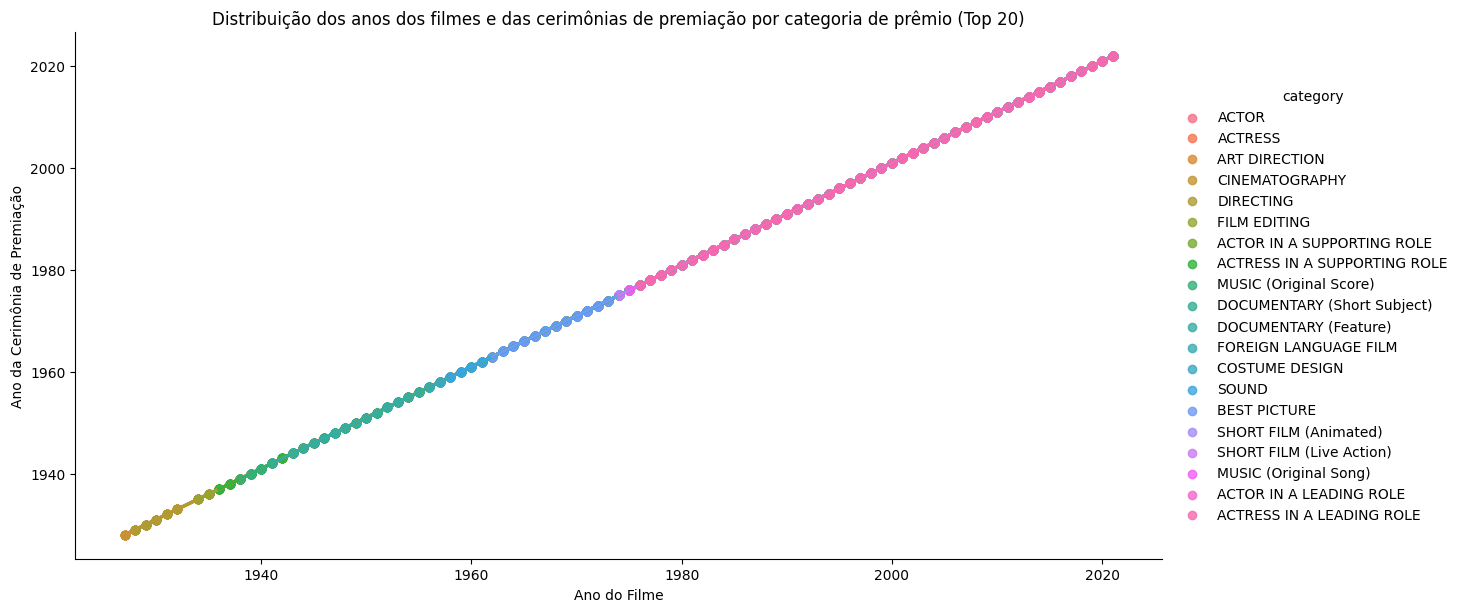

In [26]:
# Importar bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Obter as 20 principais categorias de prêmios
top_20_categorias = df[df['category'].isin(vitorias_por_categoria.index)]

# Gráfico de Dispersão com Regressão Linear por Categoria de Prêmio (apenas top 20)
plt.figure(figsize=(12, 8))
sns.lmplot(x='year_film', y='year_ceremony', hue='category', data=top_20_categorias, aspect=2, height=6)
plt.title('Distribuição dos anos dos filmes e das cerimônias de premiação por categoria de prêmio (Top 20)')
plt.xlabel('Ano do Filme')
plt.ylabel('Ano da Cerimônia de Premiação')
plt.show()


# 2. Existe uma tendência temporal nas categorias de premiação mais frequentes ao longo dos anos?


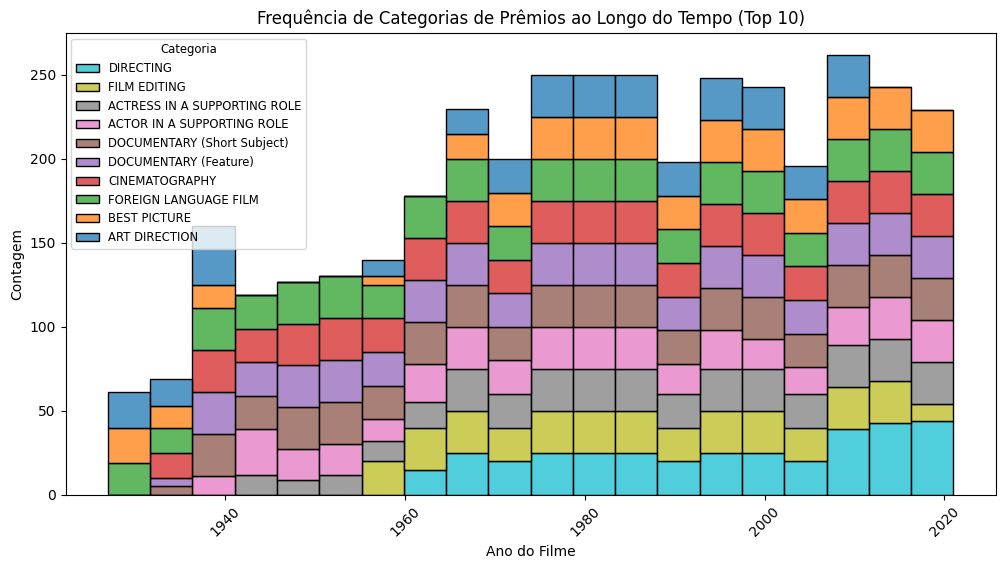

In [42]:
# Obter as 10 principais categorias de prêmios
top_10_categorias = vitorias_por_categoria.head(10).index

# Filtrar o DataFrame para incluir apenas as 10 principais categorias
top_10_categorias_df = top_20_categorias[top_20_categorias['category'].isin(top_10_categorias)]

# Gráfico de Área Empilhada mostrando a Frequência de Categorias de Prêmios ao Longo do Tempo (apenas top 10)
plt.figure(figsize=(12, 6))
sns.histplot(data=top_10_categorias_df, x='year_film', hue='category', multiple='stack', palette='tab10')
plt.title('Frequência de Categorias de Prêmios ao Longo do Tempo (Top 10)')
plt.xlabel('Ano do Filme')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Categoria', loc='upper left', labels=top_10_categorias, fontsize='small', title_fontsize='small')
plt.show()


# 3. Qual é o número de vitórias para cada categoria(mais relevantes)?

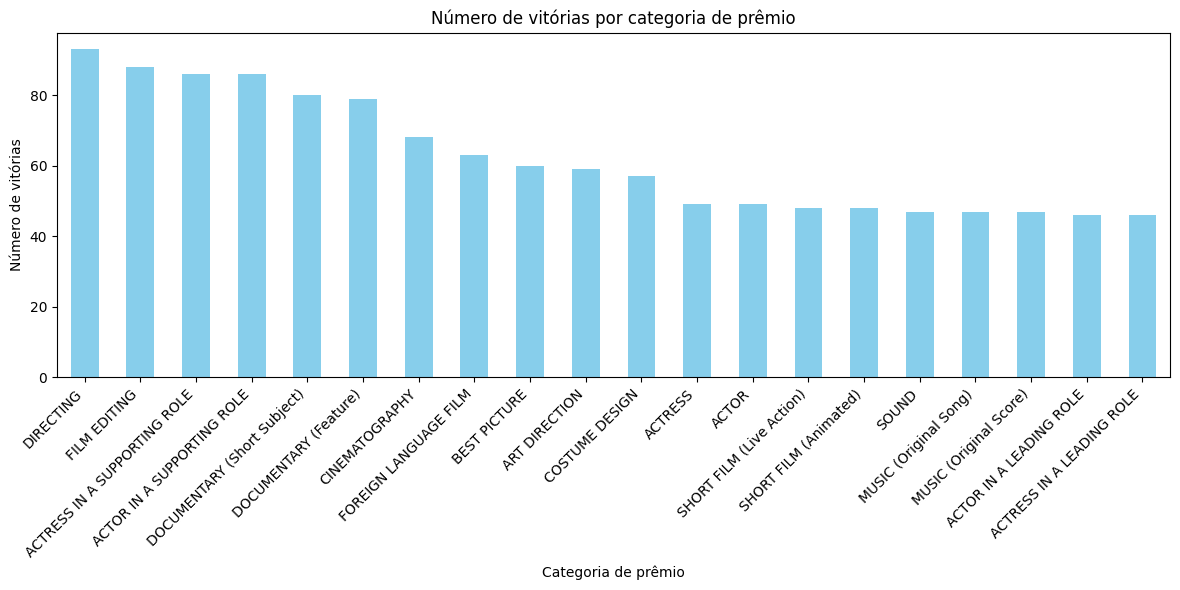

In [45]:
# Contar o número de vitórias para cada categoria
vitorias_por_categoria = df[df['winner'] == 1]['category'].value_counts().head(20)
plt.figure(figsize=(12, 6))
vitorias_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Número de vitórias por categoria de prêmio')
plt.xlabel('Categoria de prêmio')
plt.ylabel('Número de vitórias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.  tendências de premiação ao longo do tempo para categorias específicas?


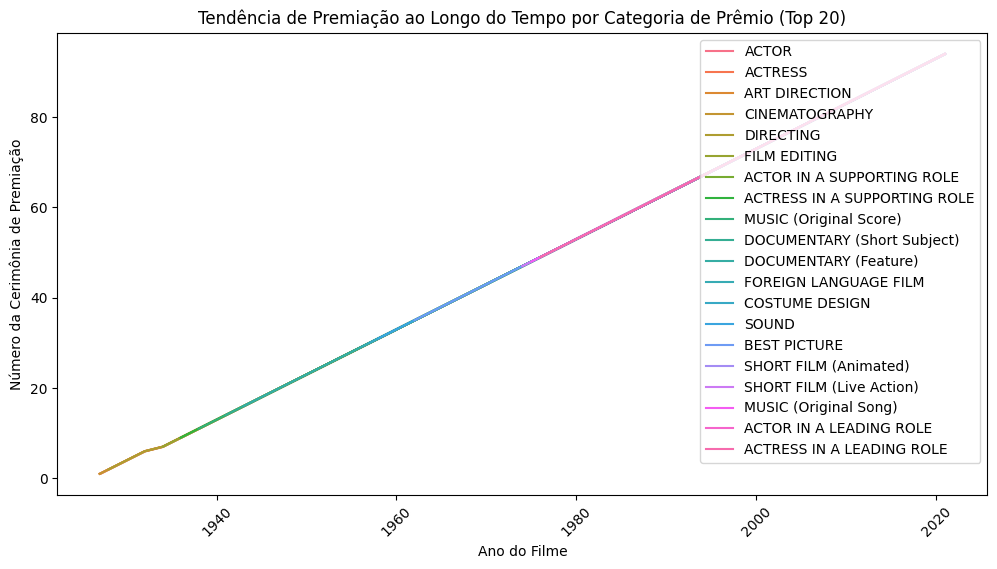

In [30]:
# Filtrar o DataFrame para incluir apenas as 20 principais categorias
df_top_20 = df[df['category'].isin(vitorias_por_categoria.index)]

# Gráfico de Linhas com Tendência de Premiação ao Longo do Tempo por Categoria de Prêmio (apenas top 20)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_film', y='ceremony', hue='category', data=df_top_20)
plt.title('Tendência de Premiação ao Longo do Tempo por Categoria de Prêmio (Top 20)')
plt.xlabel('Ano do Filme')
plt.ylabel('Número da Cerimônia de Premiação')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


# 5. Como a distribuição dos vencedores varia entre diferentes categorias de premiação ao longo dos anos?


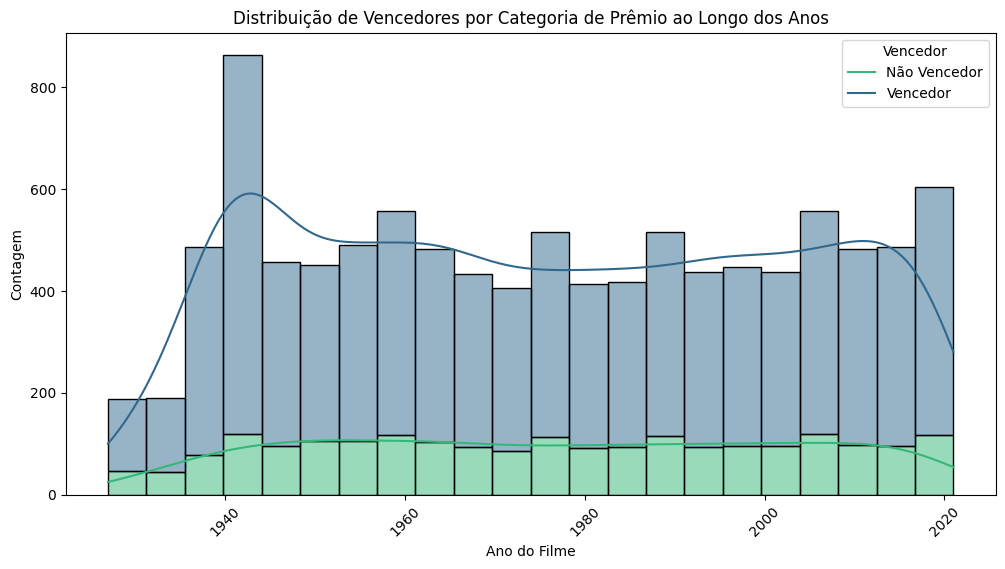

In [46]:
# Gráfico de Barras Estocástico mostrando a Distribuição de Vencedores por Categoria de Prêmio ao Longo dos Anos
plt.figure(figsize=(12, 6))
sns.histplot(df, x='year_film', hue='winner', multiple='stack', palette='viridis', kde=True)
plt.title('Distribuição de Vencedores por Categoria de Prêmio ao Longo dos Anos Estocástico')
plt.xlabel('Ano do Filme')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Vencedor', loc='upper right', labels=['Não Vencedor', 'Vencedor'])
plt.show()
